# TITANIC CLASSIFICATION

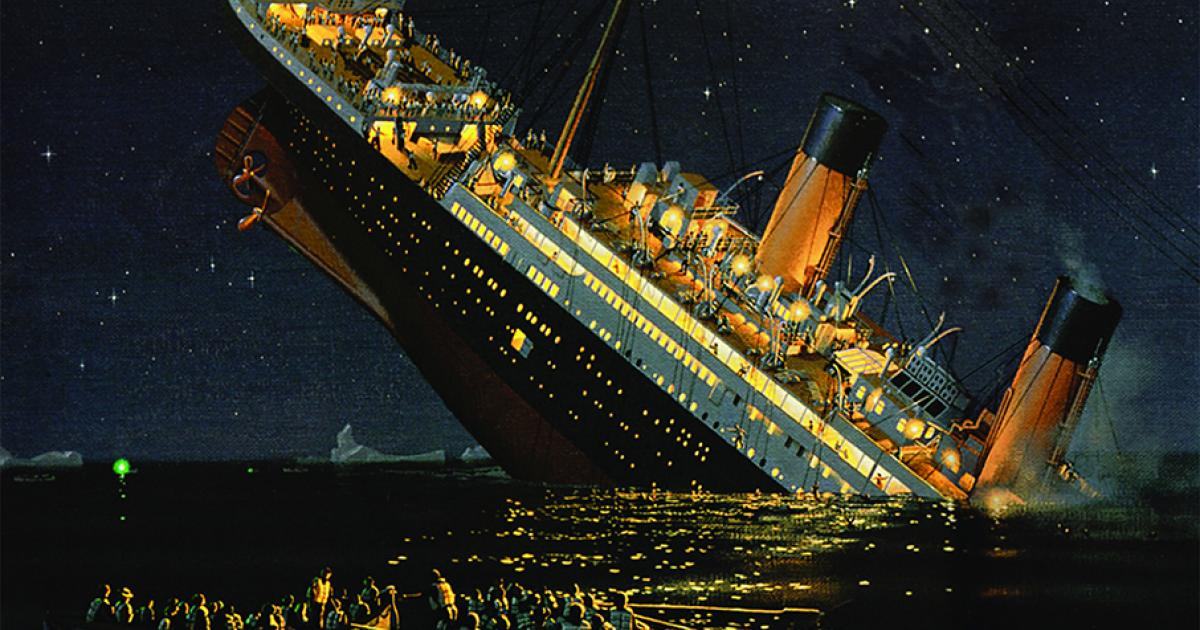

## PROBLEM STATEMENT : 
#### Create a system that predicts whether a person will survive a sinking event. Determine the factors that are most likely to contribute to their chances of survival, such as socio-economic status, age, gender, and more.

### IMPORT MODULES

In [92]:
# data analysis libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# model selection
from sklearn.model_selection import train_test_split

# importing model
from sklearn.linear_model import LogisticRegression

# calculating accuracy
from sklearn.metrics import accuracy_score

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [93]:
# importing the dataset
filename='D:/Bharat intern/TASK-2/Titanic/train.csv'
titanic_data = pd.read_csv(filename)

# printing first five rows of dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
# number of rows and columns
titanic_data.shape

(891, 12)

In [95]:
# getting information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [97]:
#number of missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### HANDLING THE MISSING VALUES

In [99]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [100]:
# drop the 'cabin' column from the df
titanic_data=titanic_data.drop('Cabin',axis=1)


In [101]:
# replacing the missing values in 'Age' column with mean value
titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)

In [102]:
# replacing missing values in 'Embarked' column 
print(titanic_data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [103]:
titanic_data["Embarked"].mode()[0]

'S'

In [104]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)

In [105]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### DATA ANALYSIS

In [107]:
titanic_data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                             

In [108]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
# Finding number of people survived
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### DATA VISUALIZATION

In [111]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

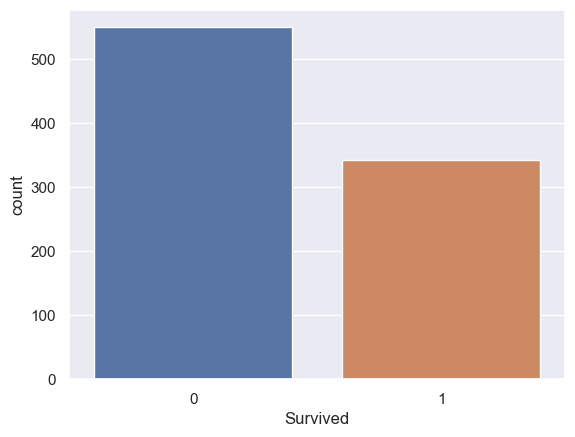

In [112]:
#count plot on the basis of "survived"
sns.countplot(data=titanic_data,x="Survived")

In [113]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

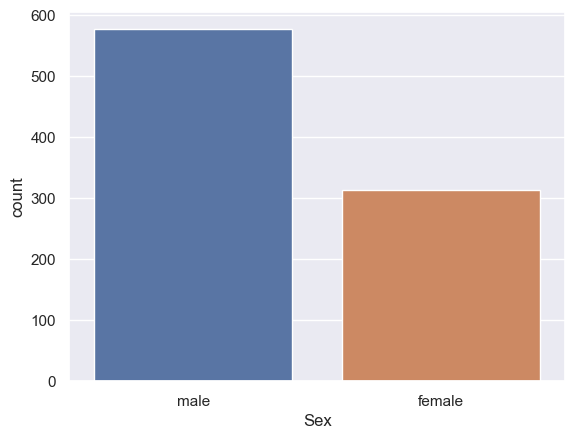

In [114]:
#count plot on the basis of "Gender"
sns.countplot(x='Sex',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

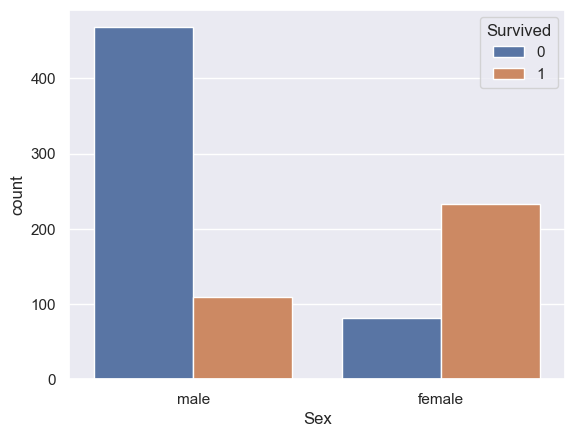

In [115]:
# number of survivors gender wise
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

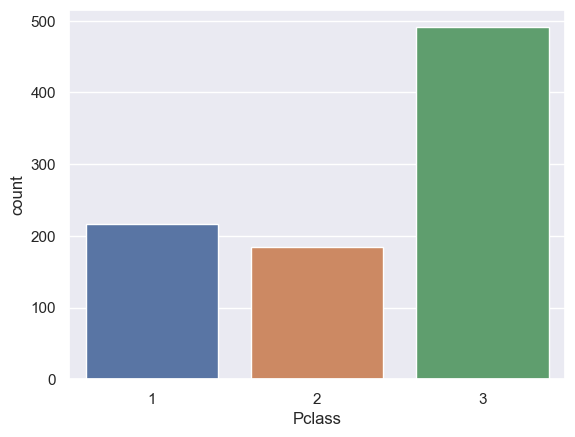

In [116]:
# making a count plot for 'Pclass' column
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

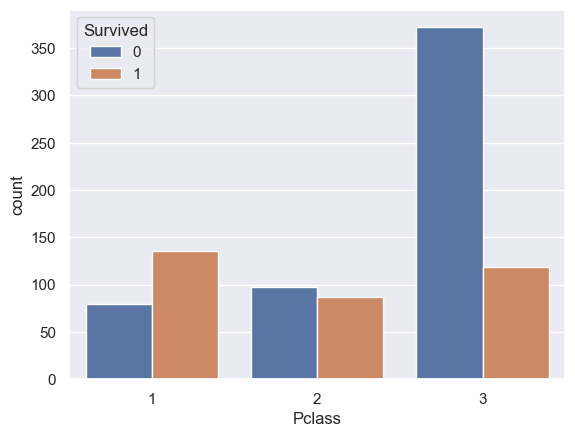

In [117]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

### ENCODING

In [119]:
#to know the value counts as per gender
titanic_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [120]:
#to know the value counts as per Enbarked
titanic_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [121]:
#encoding the categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':1,'C':2,'Q':3}},inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1


In [122]:
x= titanic_data.drop(["PassengerId","Name","Survived","Ticket"],axis=1)
y= titanic_data["Survived"]

In [123]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,2
2,3,1,26.000000,0,0,7.9250,1
3,1,1,35.000000,1,0,53.1000,1
4,3,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,1
888,3,1,29.699118,1,2,23.4500,1
889,1,0,26.000000,0,0,30.0000,2


In [124]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [133]:
# SPLITTING DATA INTO TRAINING DATA AND TEST DATA

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [135]:
x.shape,x_train.shape,x_test.shape

((891, 7), (712, 7), (179, 7))

###  MODEL TRAINING

In [138]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### MODEL EVALUATION

In [ ]:
# ACCURACY SCORE

In [146]:
x_train_prediction=model.predict(x_train)
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [142]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print("Accuracy on the training data is:",training_data_accuracy)

Accuracy on the training data is: 0.8103932584269663


In [150]:
# Convert accuracy to percentage
training_data_accuracy_percentage = training_data_accuracy * 100

# Print the accuracy on the training data
print("Accuracy percentage on the training data is:", training_data_accuracy_percentage, "%")

Accuracy percentage on the training data is: 81.03932584269663 %


In [164]:
x_test_prediction = model.predict(x_test)
print(x_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [165]:
#accuracy on the test data
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("Accuracy on the training data is:",test_data_accuracy)

Accuracy on the training data is: 0.7821229050279329


In [166]:
# Convert accuracy to percentage
test_data_accuracy_percentage = test_data_accuracy * 100

# Print the accuracy on the training data
print("Accuracy percentage on the training data is:", test_data_accuracy_percentage, "%")

Accuracy percentage on the training data is: 78.2122905027933 %


### TESTING

In [187]:
input_data=(1,0,59,1,0,7.28,1)
#change the input array into numpy array
input_as_numpy=np.asarray(input_data)
input_as_numpy

array([ 1.  ,  0.  , 59.  ,  1.  ,  0.  ,  7.28,  1.  ])

In [188]:
# Reshape the numpy array 
input_reshaped=input_as_numpy.reshape(1,-1)
# As we are predicting for only one instance
prediction_data=model.predict(input_reshaped)
prediction_data

array([0], dtype=int64)

In [193]:
print(prediction_data)
if prediction_data[0] == 0:
    print("THE PERSON WON'T BE SAVED FROM SINKING.")
else:
    print("THE PERSON WILL BE SAVED FROM SINKING.")

[0]
THE PERSON WON'T BE SAVED FROM SINKING.


In [194]:
print(prediction_data)
if prediction_data[0] == 1:
    print("THE PERSON WON'T BE SAVED FROM SINKING.")
else:
    print("THE PERSON WILL BE SAVED FROM SINKING.")

[0]
THE PERSON WILL BE SAVED FROM SINKING.
